# Analise de dados da parte de Benefícios ao cidadão do auxilio emergencial 

Este projeto tem como objetivo analisar os dados do benefício auxilio emergencial.


Os dados foram tirados do Portal da Transparência do governo Federal específicamente da pagina : http://www.portaltransparencia.gov.br/download-de-dados/auxilio-emergencial  

E o dicionário de dados foi tirado desta pagina: http://www.portaldatransparencia.gov.br/pagina-interna/603515-dicionario-de-dados-auxilio-emergencial 

### Dicionário de dados 

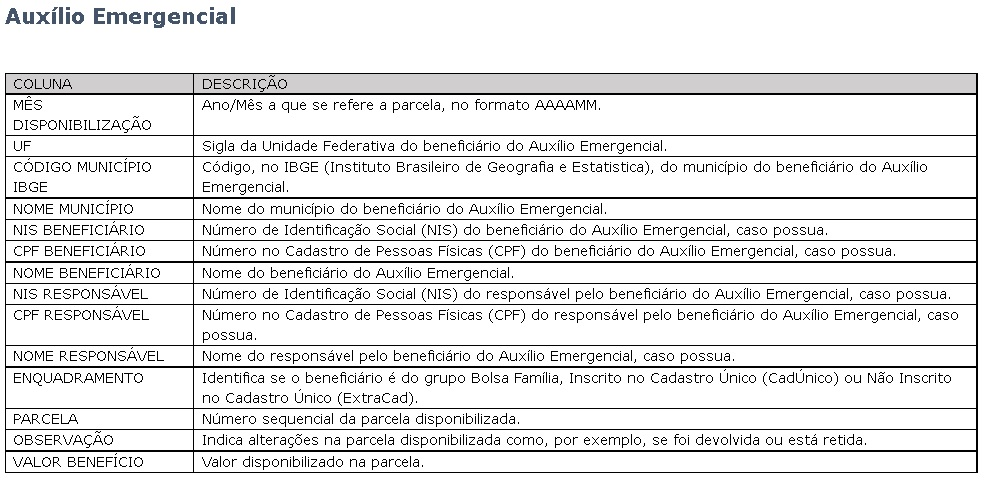

In [1]:
from IPython.display import Image
Image(filename='dicionario_dados.jpg') 

In [2]:
# Pacotes utilizados para carregar, salvar, analise e apresentar gráficos dos dados baixados
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

### Contabilizando quantos meses existem na base de dados do auxilio emergencial baixados 

In [3]:
pasta = 'base_dados'
lista_arquivos = os.listdir(pasta)
n = 0
for arq in lista_arquivos:
    n+=1
    print(arq)
print(120*'--')    
print('Existem {} arquivos csv, portanto {} meses'.format(n,n))

202004_AuxilioEmergencial.csv
202005_AuxilioEmergencial.csv
202006_AuxilioEmergencial.csv
202007_AuxilioEmergencial.csv
202008_AuxilioEmergencial.csv
202010_AuxilioEmergencial.csv
202011_AuxilioEmergencial.csv
202012_AuxilioEmergencial.csv
202101_AuxilioEmergencial.csv
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Existem 9 arquivos csv, portanto 9 meses


#### Devido os dados terem tamanho muito grande vamos utilizar 0.2% dos dados

####  Vamos analizas um único mês para podermos automatizar o tratamento de dados e colunas, já que todos terão o mesmo formato e os mesmos nomes de colunas

In [4]:
# Lendo uma amostra de 0.2% dos dados, pois a base de dados tem mais de 8Gb de tamanho e ;
# Utilizar o ';' como separate para separar as colunas;
# Utilizar o enconding ISO-8859-1 que o indicado para dados do governo brasileiro;
# adicionar o skiprows para coletar uma linha a cada 300 linhas, para assim diminuir a amostra de dados


df_202004 = pd.read_csv('base_dados/202004_AuxilioEmergencial.csv', 
                 sep=';',
                 encoding = "ISO-8859-1",                      
                 skiprows = lambda i: i% 500)
df_202004.head()

,MÊS DISPONIBILIZAÇÃO,UF,CÓDIGO MUNICÍPIO IBGE,NOME MUNICÍPIO,NIS BENEFICIÁRIO,CPF BENEFICIÁRIO,NOME BENEFICIÁRIO,NIS RESPONSÁVEL,CPF RESPONSÁVEL,NOME RESPONSÁVEL,ENQUADRAMENTO,PARCELA,OBSERVAÇÃO,VALOR BENEFÍCIO
0,202004,NaN,NaN,NaN,0,***.230.780-**,CLAURI GOMES VELHO,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Pagamento bloqueado ou cancelado,"600,00"
1,202004,NaN,NaN,NaN,0,***.786.503-**,GABRIELA MOREIRA,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Pagamento bloqueado ou cancelado,"600,00"
2,202004,NaN,NaN,NaN,0,***.583.217-**,KEDMA CAETANO REZENDE,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Pagamento bloqueado ou cancelado,"1200,00"
3,202004,NaN,NaN,NaN,0,***.122.618-**,MICHELANGELO ROMANO,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Não há,"600,00"
4,202004,NaN,NaN,NaN,0,***.093.950-**,SONIA MARIA PEREIRA DA SILVA,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Pagamento bloqueado ou cancelado,"600,00"


In [5]:
# Salvando dados no ambiente local
df_202004.to_csv('df_202004')

In [6]:
# Carregando dados salvos e visualizando as 5 linhas primeiras
df_202004 = pd.read_csv('df_202004', index_col=0)
df_202004.head()

,MÊS DISPONIBILIZAÇÃO,UF,CÓDIGO MUNICÍPIO IBGE,NOME MUNICÍPIO,NIS BENEFICIÁRIO,CPF BENEFICIÁRIO,NOME BENEFICIÁRIO,NIS RESPONSÁVEL,CPF RESPONSÁVEL,NOME RESPONSÁVEL,ENQUADRAMENTO,PARCELA,OBSERVAÇÃO,VALOR BENEFÍCIO
0,202004,NaN,NaN,NaN,0,***.230.780-**,CLAURI GOMES VELHO,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Pagamento bloqueado ou cancelado,"600,00"
1,202004,NaN,NaN,NaN,0,***.786.503-**,GABRIELA MOREIRA,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Pagamento bloqueado ou cancelado,"600,00"
2,202004,NaN,NaN,NaN,0,***.583.217-**,KEDMA CAETANO REZENDE,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Pagamento bloqueado ou cancelado,"1200,00"
3,202004,NaN,NaN,NaN,0,***.122.618-**,MICHELANGELO ROMANO,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Não há,"600,00"
4,202004,NaN,NaN,NaN,0,***.093.950-**,SONIA MARIA PEREIRA DA SILVA,-2,NaN,Não se aplica,EXTRA CADUN,1ª,Pagamento bloqueado ou cancelado,"600,00"


In [7]:
# definindo função para calcular a porcentagem de valores nulos de cada variável
def percent_Nan(df):
    return (df.isnull().sum()/df.shape[0]*100).map("{:.2f}%".format)

In [8]:
# Porcentagem de valores Nan de cada Coluna 
percent_Nan(df_202004)

MÊS DISPONIBILIZAÇÃO      0.00%
UF                        0.01%
CÓDIGO MUNICÍPIO IBGE     0.01%
NOME MUNICÍPIO            0.01%
NIS BENEFICIÁRIO          0.00%
CPF BENEFICIÁRIO          0.00%
NOME BENEFICIÁRIO         0.00%
NIS RESPONSÁVEL           0.00%
CPF RESPONSÁVEL          60.77%
NOME RESPONSÁVEL          0.00%
ENQUADRAMENTO             0.00%
PARCELA                   0.00%
OBSERVAÇÃO               39.23%
VALOR BENEFÍCIO           0.00%
dtype: object

### Tratando os valores Nan em cada coluna 

#### Coluna OBSERVAÇÃO

In [9]:
# Verificando quantidade de valores Nan 
df_202004.OBSERVAÇÃO.value_counts(dropna=False)

Não há                              54755
NaN                                 38488
Pagamento bloqueado ou cancelado     4655
Valor devolvido à União.              215
Name: OBSERVAÇÃO, dtype: int64

In [10]:
# Supondo que o valor Nan seja equivalente ao valor 'Não há', vamos substituir o valor Nan por 'Não há'.
df_202004.fillna(value={'OBSERVAÇÃO':'Não há'}, inplace=True)

#### CPF RESPONSÁVEL

In [11]:
# Verificando quantidade de valores Nan 
df_202004['CPF RESPONSÁVEL'].value_counts(dropna=False)

NaN               59625
***.000.000-**      142
***.540.898-**        4
***.538.685-**        3
***.167.036-**        3
                  ...  
***.326.709-**        1
***.306.619-**        1
***.189.243-**        1
***.358.958-**        1
***.766.982-**        1
Name: CPF RESPONSÁVEL, Length: 37372, dtype: int64

In [12]:
# Supondo que o valor Nan seja equivalente ao valor ***.000.000-**, por isso vamos substituir os dois por '' vazio
df_202004.fillna(value={'CPF RESPONSÁVEL':''}, inplace=True)
df_202004.replace(to_replace='***.000.000-**', value='', inplace=True)

#### NOME MUNICÍPIO e UF 

In [13]:
# Verificando quantidade de valores Nan 
df_202004['NOME MUNICÍPIO'].isnull().sum()

5

In [15]:
# devido a quantidade de valores Nan ser pequena vamos substituir pela moda que no caso é
df_202004['NOME MUNICÍPIO'].fillna(df_202004['NOME MUNICÍPIO'].mode()[0], inplace=True)

In [16]:
# A mesma coisa serve para UF e CÓDIGO MUNICÍPIO IBGE , ou seja subistitui por SP
df_202004['UF'].fillna(df_202004['UF'].mode()[0], inplace=True)
df_202004['CÓDIGO MUNICÍPIO IBGE'].fillna(df_202004['CÓDIGO MUNICÍPIO IBGE'].mode()[0], inplace=True)

In [17]:
# Não temos mais valores Nan
percent_Nan(df_202004)

MÊS DISPONIBILIZAÇÃO     0.00%
UF                       0.00%
CÓDIGO MUNICÍPIO IBGE    0.00%
NOME MUNICÍPIO           0.00%
NIS BENEFICIÁRIO         0.00%
CPF BENEFICIÁRIO         0.00%
NOME BENEFICIÁRIO        0.00%
NIS RESPONSÁVEL          0.00%
CPF RESPONSÁVEL          0.00%
NOME RESPONSÁVEL         0.00%
ENQUADRAMENTO            0.00%
PARCELA                  0.00%
OBSERVAÇÃO               0.00%
VALOR BENEFÍCIO          0.00%
dtype: object

#### Função para automatizar tratamento de valores Nan

In [18]:
def trata_Nan(df):
    df.fillna(value={'OBSERVAÇÃO':'Não há'}, inplace=True)
    df.fillna(value={'CPF RESPONSÁVEL':'-'}, inplace=True)
    df.replace(to_replace='***.000.000-**', value='-', inplace=True)
    df['NOME MUNICÍPIO'].fillna(df['NOME MUNICÍPIO'].mode()[0], inplace=True)
    df['UF'].fillna(df['UF'].mode()[0], inplace=True)
    df['CÓDIGO MUNICÍPIO IBGE'].fillna(df['CÓDIGO MUNICÍPIO IBGE'].mode()[0], inplace=True)
    return df.to_csv()

### Análises 

In [19]:
# Visualizando o nome das colunas em lista
list(df_202004.columns)

['MÊS DISPONIBILIZAÇÃO',
 'UF',
 'CÓDIGO MUNICÍPIO IBGE',
 'NOME MUNICÍPIO',
 'NIS BENEFICIÁRIO',
 'CPF BENEFICIÁRIO',
 'NOME BENEFICIÁRIO',
 'NIS RESPONSÁVEL',
 'CPF RESPONSÁVEL',
 'NOME RESPONSÁVEL',
 'ENQUADRAMENTO',
 'PARCELA',
 'OBSERVAÇÃO',
 'VALOR BENEFÍCIO']

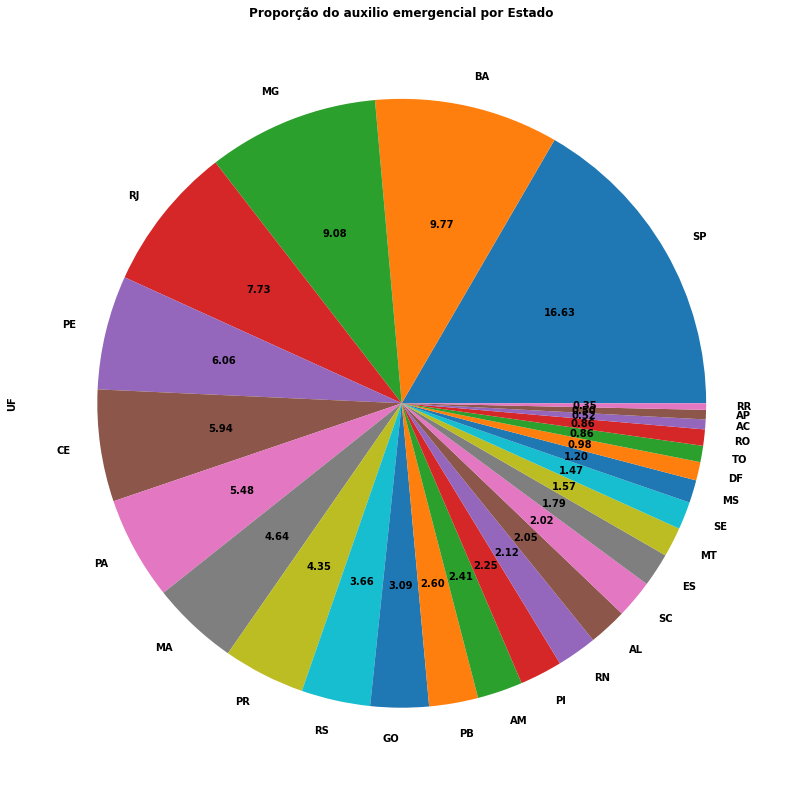

In [83]:
# 
df_202004['UF'].value_counts().plot.pie(autopct='%.2f', figsize=(18,14))
plt.title('Proporção do auxilio emergencial por Estado')
plt.show()

In [33]:
# Analise em proporção de quantidade do valor do Benefício(600,00 ou 1200,00)  por estado:
((df_202004.groupby(['UF'])['VALOR BENEFÍCIO']
           .value_counts(normalize=True)*100)
           .map("{:.4}%".format))\
           .to_frame('count')

count
UF VALOR BENEFÍCIO        
AC 600,00           81.32%
   1200,00          18.68%
AL 600,00           77.64%
   1200,00          22.36%
AM 600,00           77.51%
   1200,00          22.49%
AP 600,00           73.17%
   1200,00          26.83%
BA 600,00           81.01%
   1200,00          18.99%
CE 600,00           82.11%
   1200,00          17.89%
DF 600,00           79.44%
   1200,00          20.56%
ES 600,00            84.8%
   1200,00           15.2%
GO 600,00           79.72%
   1200,00          20.28%
MA 600,00           79.27%
   1200,00          20.73%
MG 600,00           85.26%
   1200,00          14.74%
MS 600,00           80.29%
   1200,00          19.71%
MT 600,00           79.53%
   1200,00          20.47%
PA 600,00           78.96%
   1200,00          21.04%
PB 600,00           80.84%
   1200,00          19.16%
PE 600,00           78.38%
   1200,00          21.62%
PI 600,00           83.27%
   1200,00          16.73%
PR 600,00           83.91%
   1200,00          16.09%
RJ 600,00           78.54%
   1200,00          21.46%
RN 600,00            81.6%
   1200,00           18.4%
RO 600,00           83.35%
   1200,00          16.65%
RR 600,00           77.88%
   1200,00          22.12%
RS 600,00           80.43%
   1200,00          19.57%
SC 600,00           82.43%
   1200,00          17.57%
SE 600,00           78.28%
   1200,00          21.72%
SP 600,00           81.47%
   1200,00          18.53%
TO 600,00           82.64%
   1200,00          17.36%

In [109]:
df_202004_UF_plot.sort_index(ascending=False)

count
UF VALOR BENEFÍCIO          
TO 600,00           0.826446
   1200,00          0.173554
SP 600,00           0.814744
   1200,00          0.185256
SE 600,00           0.782790
   1200,00          0.217210
SC 600,00           0.824331
   1200,00          0.175669
RS 600,00           0.804342
   1200,00          0.195658
RR 600,00           0.778761
   1200,00          0.221239
RO 600,00           0.833530
   1200,00          0.166470
RN 600,00           0.815954
   1200,00          0.184046
RJ 600,00           0.785394
   1200,00          0.214606
PR 600,00           0.839072
   1200,00          0.160928
PI 600,00           0.832655
   1200,00          0.167345
PE 600,00           0.783757
   1200,00          0.216243
PB 600,00           0.808386
   1200,00          0.191614
PA 600,00           0.789581
   1200,00          0.210419
MT 600,00           0.795337
   1200,00          0.204663
MS 600,00           0.802876
   1200,00          0.197124
MG 600,00           0.852588
   1200,00          0.147412
MA 600,00           0.792747
   1200,00          0.207253
GO 600,00           0.797164
   1200,00          0.202836
ES 600,00           0.848036
   1200,00          0.151964
DF 600,00           0.794393
   1200,00          0.205607
CE 600,00           0.821128
   1200,00          0.178872
BA 600,00           0.810120
   1200,00          0.189880
AP 600,00           0.731707
   1200,00          0.268293
AM 600,00           0.775095
   1200,00          0.224905
AL 600,00           0.776394
   1200,00          0.223606
AC 600,00           0.813230
   1200,00          0.186770

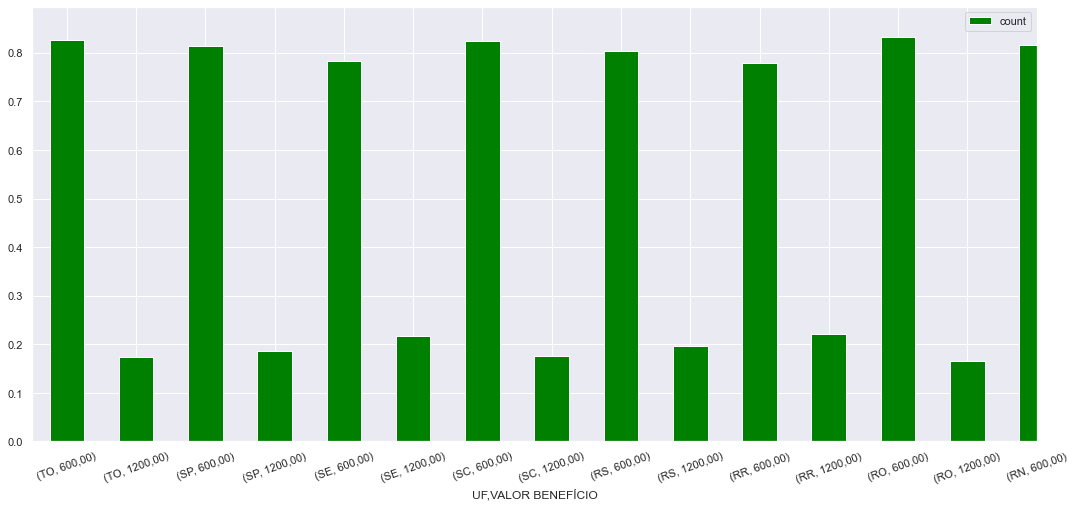

In [110]:
df_202004_UF_plot = df_202004.groupby(['UF'])['VALOR BENEFÍCIO']\
           .value_counts(normalize=True)\
           .to_frame('count')
df_202004_UF_plot = df_202004_UF_plot.sort_index(ascending=False)
# df_202004_UF_plot.head()
# plt.figure(figsize=(14,8))
# plt.bar(df_202004_UF_plot.index, list(df_202004_UF_plot.values))
# pltt.show()

df_202004_UF_plot.plot(kind='bar', figsize=(18,8), colormap='ocean')
sns.set()
plt.xticks(rotation=20)
plt.xlim(right=14)
plt.show()

In [ ]:
Enquadramento 

In [24]:

((df_202004.groupby(['ENQUADRAMENTO'])['VALOR BENEFÍCIO']
           .value_counts(normalize=True)*100)
           .map("{:.4}%".format))\
           .to_frame('count')

count
ENQUADRAMENTO   VALOR BENEFÍCIO        
BOLSA FAMILIA   600,00           68.22%
                1200,00          31.78%
CADUN NAO BOLSA 600,00           88.64%
                1200,00          11.36%
EXTRA CADUN     600,00           89.48%
                1200,00          10.52%

In [22]:
# Pode-se observar que nessa amostra de dados não houve cancelamento do auxilio pra quem já estava no BOLSA FAMILIA
((df_202004.groupby(['ENQUADRAMENTO'])['OBSERVAÇÃO']
           .value_counts(normalize=True)*100)
           .map("{:.4}%".format))\
           .to_frame('count')

count
ENQUADRAMENTO   OBSERVAÇÃO                               
BOLSA FAMILIA   Não há                             100.0%
CADUN NAO BOLSA Não há                             88.48%
                Pagamento bloqueado ou cancelado   11.15%
                Valor devolvido à União.            0.37%
EXTRA CADUN     Não há                             93.63%
                Pagamento bloqueado ou cancelado   6.013%
                Valor devolvido à União.          0.3556%

In [127]:
# Analisando NOME BENEFICÁRIO e NIS RESPONSÁVEL repetidos 
df_202004.groupby([
    
                    'UF'
#                     'NOME MUNICÍPIO'
#                    'NOME BENEFICIÁRIO',
#                    'NIS RESPONSÁVEL',
#                     'NIS BENEFICIÁRIO', 
#                       'ENQUADRAMENTO',
#                       'OBSERVAÇÃO'
#                     'VALOR BENEFÍCIO'  
#                     'CPF RESPONSÁVEL'
#                       'CPF BENEFICIÁRIO'
                        
                                        ])\
            .size()\
            .reset_index(name='count')\
            .sort_values(by='count',
                         ascending=False)\
            .reset_index(drop=True)
            

,UF,count
0,SP,16318
1,BA,9585
2,MG,8907
3,RJ,7586
4,PE,5947
5,CE,5831
6,PA,5375
7,MA,4550
8,PR,4269
9,RS,3593


In [123]:
df_202004.groupby(['ENQUADRAMENTO'])['OBSERVAÇÃO'].value_counts().to_frame('count').reset_index()

,ENQUADRAMENTO,OBSERVAÇÃO,count
0,BOLSA FAMILIA,Não há,38488
1,CADUN NAO BOLSA,Não há,18414
2,CADUN NAO BOLSA,Pagamento bloqueado ou cancelado,2321
3,CADUN NAO BOLSA,Valor devolvido à União.,77
4,EXTRA CADUN,Não há,36341
5,EXTRA CADUN,Pagamento bloqueado ou cancelado,2334
6,EXTRA CADUN,Valor devolvido à União.,138


### Recomeçar a partir daqui

In [ ]:
# Automatizando tudo que foi feito até agora na função trata_dados

def trata_dados(df, arquivo_csv):
      
    # Substituindo valores Nan da coluna OBSERVAÇÃO por 'Não há'
    df.fillna(value={'OBSERVAÇÃO':'Não há'}, inplace=True)
    
    # Deletando as linhas que sobraram de valores Nan
    df.dropna(axis=0, inplace=True)
    
    # Substituindo espaço por _ nos nomes das colunas
    df.columns = df.columns.str.replace(' ', '_')
    
    # Colocando a coluna 'MÊS_DISPONIBILIZAÇÃO' como index
    df.columns = df.set_index('MÊS_DISPONIBILIZAÇÃO')
   
    
    # Salvando o dataset com a referência de data no nome em formato csv
    
    
    df.to_csv('base_dados_amostra/amostra_{}'.format(arquivo_csv))
    
    return print('o arquivo amostra_{} foi tratado e salvo na pasta base_dados_amostra'.format(arquivo_csv))

In [ ]:
# Vamos usar a lista_arquivos que foi criada no começo do notebook
# e a função trata_dados 
for dado in lista_arquivos:
    df = pd.read_csv('base_dados/{}'.format(dado), sep=';',
                     encoding = "ISO-8859-1",
                     usecols=[0,1,3,10,11,12,13],
                     skiprows = lambda i: i% 300)
    trata_dados(df,dado)    

In [ ]:
# Agora vamos passar os arquivos CSV para dataframe
pasta = 'base_dados_amostra'
lista_amostra = os.listdir(pasta)
lista_df =[]
for csv in lista_amostra[1:]:   
    df = pd.read_csv('base_dados_amostra/{}'.format(csv), index_col=0)
    lista_df.append(df)

In [ ]:
df_total = pd.concat(lista_df, ignore_index=True, sort=False, )
df_total

In [ ]:
df_total.to_csv('base_dados_amostra/data_totals.csv')

In [ ]:
df_t= pd.read_csv('base_dados_amostra/data_totals.csv', index_col=0)
df_t

In [ ]:
df_t.OBSERVAÇÃO.value_counts(normalize=True).plot.pie()

In [ ]:
df_total

In [ ]:
df_total.set_index('MÊS_DISPONIBILIZAÇÃO', inplace=True)

In [ ]:
df_total.isnull().sum()